In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

from CharacterFeatureExtractor import featureExtractor
from dataprep import *
from modeltrain import *
from classifier import *
from hmm_test import *
from createData import createData
from createDataSet import *
from DrawCharacter import DrawCharacter
from PattRecClasses import HMM_TA
from hmm_gen import hmm_gen

from featurevisual import featurevisual
from modelvisual import modelvisual

# Creating a dataset

In [2]:
# From pre-drawn letters, perform feature extraction and create a database with features and labels.

#createDataSet(act=False, name="database")


# Model training example

In [3]:
# Specify the database to load
db_name = "Bigdata"

cv_train_acc = []
cv_acc = []
hmm_list = []
train_list = []
test_list = []
cmatrix_list = []

itr = 1
for i in range(itr):
    # Load in and divide the database into training and testing data, nr_test being the amount of test data.
    train_data, test_data, data_labels = dataprep(db_name, nr_test=10, shuffle=True)

    # Specify the number of states the different character HMMs should have

    #class_state_nums = np.array([5,5,5,5,5,3,4,5,4,5])

    class_state_nums = np.array([5, 5, 5, 5, 6, 3, 5, 5, 4, 5])
    # Number of training iterations
    itr = 12

    # Initialize and train the models
    hmm_learn, train_acc = modeltrain(train_data, data_labels, itr, class_state_nums, longest_sample=True, useprint=False)

    # Test the models and extract results
    accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn,test_data, data_labels, useprint=False)
    
    cv_train_acc += [train_acc]
    cv_acc += [accuracies]
    hmm_list += [hmm_learn]
    train_list += [train_data]
    test_list += [test_data]
    cmatrix_list += [cmatrix]
    
print(cv_acc)


Database read is  Bigdata
Labels used are  ['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
Total training samples are  20  and testing samples are  10 


 ------------ CHARACTER  A , k = 0 ------------
Number of states:  5
Avg probability for entire sequence over test samples is -12.565449695227295  (log),  0.00034905553957519493 %
Normalized score:  34.905553957519494

 ------------ CHARACTER  C , k = 1 ------------
Number of states:  5
Avg probability for entire sequence over test samples is -10.759065227395668  (log),  0.002125187933105961 %
Normalized score:  212.51879331059612

 ------------ CHARACTER  K , k = 2 ------------
Number of states:  5
Avg probability for entire sequence over test samples is -9.844205241778123  (log),  0.005305373756389896 %
Normalized score:  530.5373756389896

 ------------ CHARACTER  P , k = 3 ------------
Number of states:  5
Avg probability for entire sequence over test samples is -13.759348325978877  (log),  0.00010577692738269193 %
Normalized 

/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:338: RuntimeWarning: invalid value encountered in double_scalars
  scaled[i, j] = res[i, j] / np.amax(res[i])


##### Classification accuracy of test samples of character K is: 90.0% #####
##### Classification accuracy of test samples of character P is: 10.0% #####
##### Classification accuracy of test samples of character X is: 100.0% #####
##### Classification accuracy of test samples of character T is: 100.0% #####
##### Classification accuracy of test samples of character + is: 0.0% #####
##### Classification accuracy of test samples of character N is: 100.0% #####


/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:56: RuntimeWarning: invalid value encountered in true_divide
  alpha[0, :] = (self.q * scaled[0]) / c[0]
/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/classifier.py:19: RuntimeWarning: divide by zero encountered in log
  clog = np.log(c)


##### Classification accuracy of test samples of character V is: 90.0% #####
##### Classification accuracy of test samples of character 4 is: 90.0% #####
[[0.5 0.  0.  0.  0.  0.2 0.3 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.9 0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.5 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.9 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.9]]
[array([0.5, 1. , 0.9, 0.1, 1. , 1. , 0. , 1. , 0.9, 0.9])]


# Save model

In [5]:
name = "DEMO.model"
with open(name, "wb") as fp:  # Pickling
    pickle.dump(hmm_learn, fp)

# Pretrained model: Results and examples of missclassifications

In [14]:
# Load model
hmm_learn = pd.read_pickle(r'varTestBest.model')
# hmm_learn = pd.read_pickle(r'HMM_Model.model')
print(data_labels)

# Test
accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn, test_data, data_labels, useprint=False, chars=[])
print(data_labels)

"""
# Display all model parameters
i = 0
for hmm in hmm_learn:
    char = data_labels[i]
    print("\n--- HMM model for character ", char , " ---")
    hmm.printoutput()
    i += 1
"""

['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
##### Classification accuracy of test samples of character A is: 100.0% #####
##### Classification accuracy of test samples of character C is: 100.0% #####


/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:338: RuntimeWarning: invalid value encountered in double_scalars
  scaled[i, j] = res[i, j] / np.amax(res[i])


##### Classification accuracy of test samples of character K is: 100.0% #####
##### Classification accuracy of test samples of character P is: 100.0% #####
##### Classification accuracy of test samples of character X is: 70.0% #####
##### Classification accuracy of test samples of character T is: 100.0% #####
##### Classification accuracy of test samples of character + is: 0.0% #####
##### Classification accuracy of test samples of character N is: 100.0% #####
##### Classification accuracy of test samples of character V is: 100.0% #####
##### Classification accuracy of test samples of character 4 is: 80.0% #####
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.7 0.  0.  0.  0.3 0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.

'\n# Display all model parameters\ni = 0\nfor hmm in hmm_learn:\n    char = data_labels[i]\n    print("\n--- HMM model for character ", char , " ---")\n    hmm.printoutput()\n    i += 1\n'

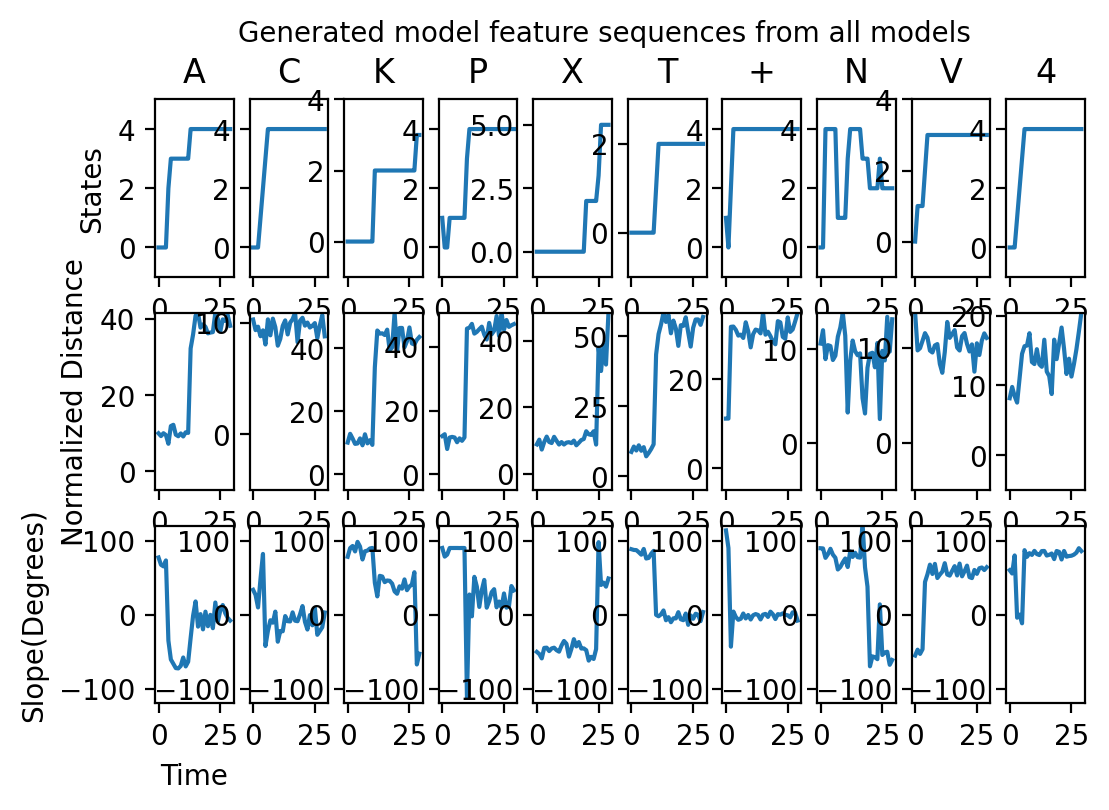

In [7]:
# Visualize trained models
samples = 10
modelvisual(hmm_learn, data_labels, samples, chars=[], overview=True)


# T and +

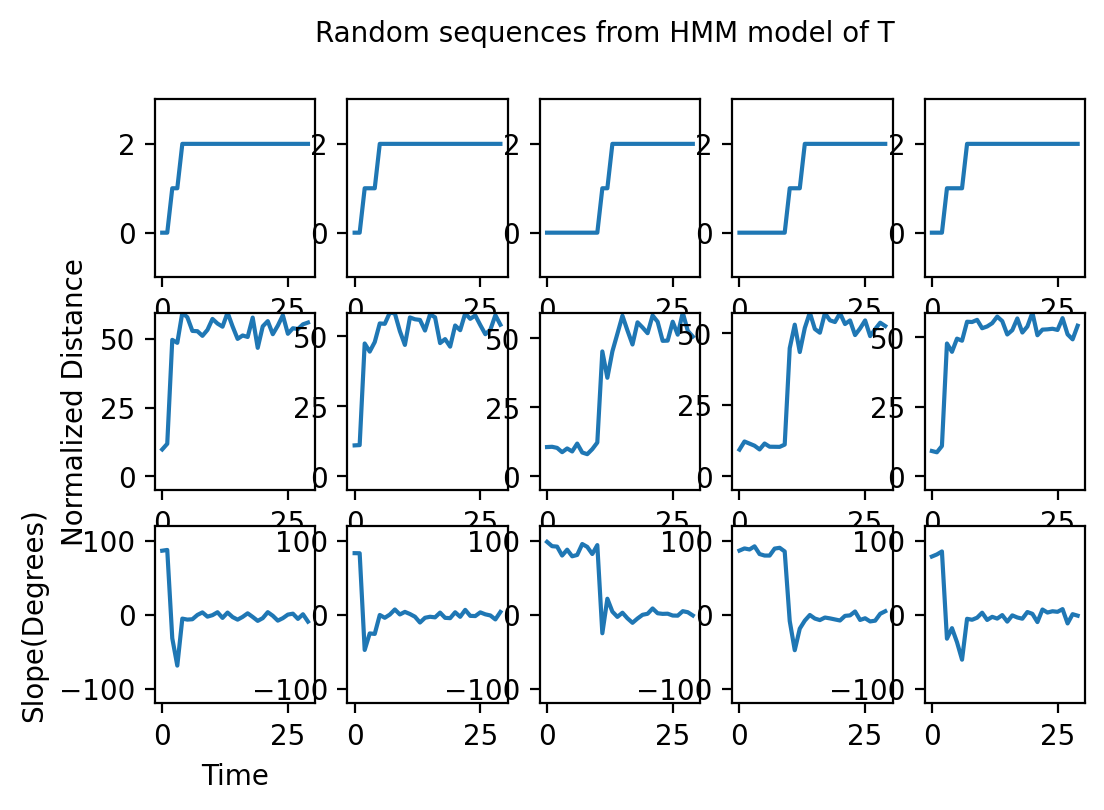

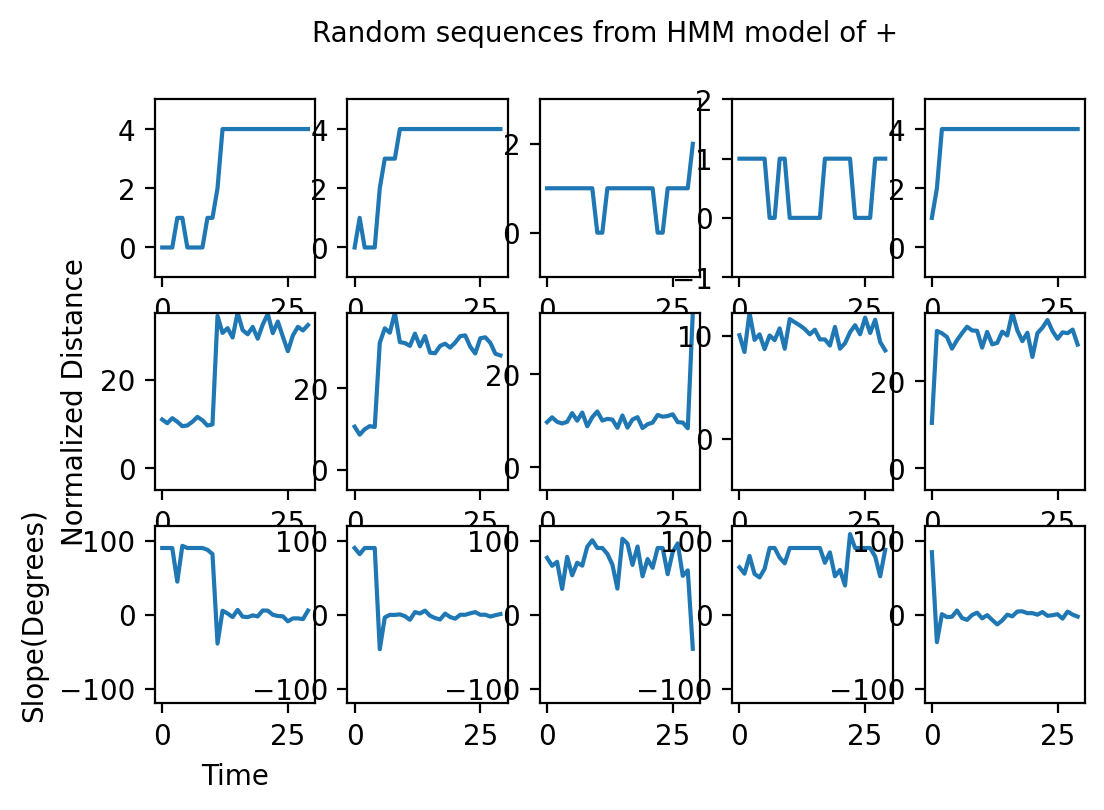

In [13]:
chars = []

samples = 5
letter = "T"
char = data_labels.index(letter)
chars += [char]
letter = "+"
char = data_labels.index(letter)
chars += [char]

modelvisual(hmm_learn, data_labels, samples, chars=chars, overview=False)


# Use pretrained model on new character input

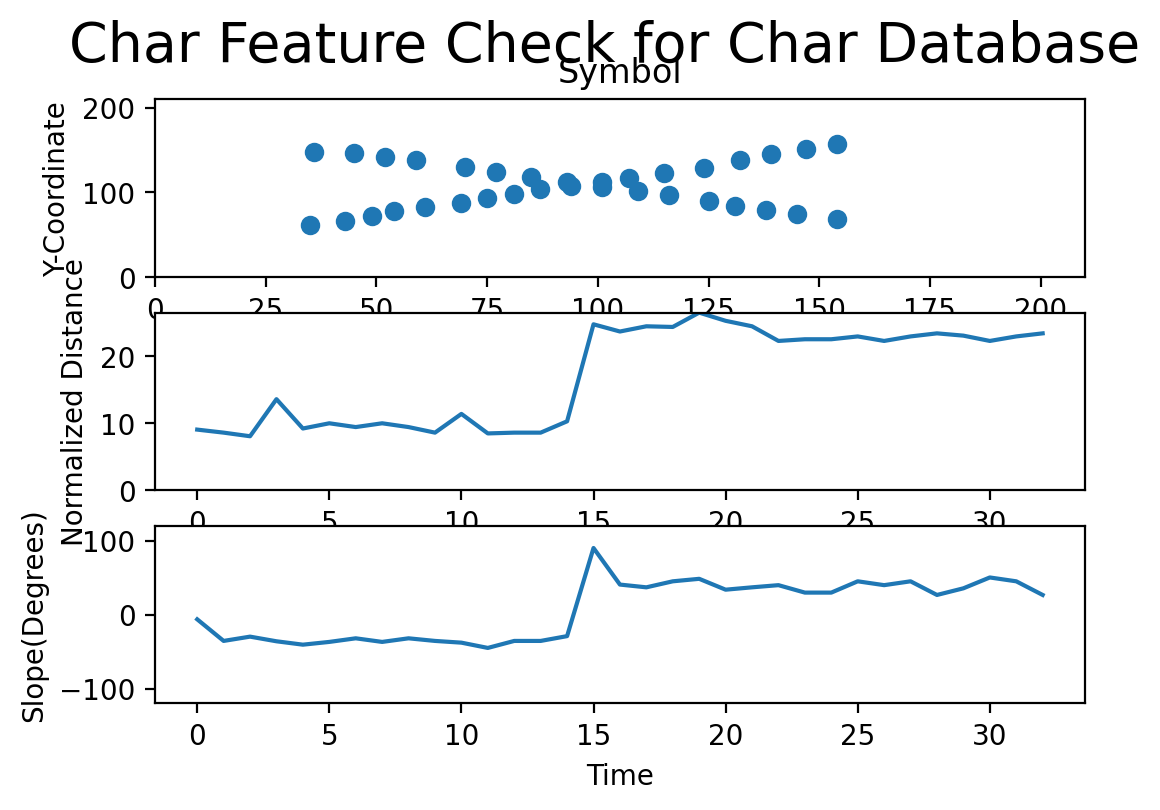

---START OF SAMPLE---
Classified as: V
P(input) =  A :  -22.607711428352264
P(input) =  C :  -18.765081623974737
P(input) =  K :  -192.39196726665153
P(input) =  P :  -252.28917533698365
P(input) =  X :  -17.84181459580844
P(input) =  T :  -316.472429697468
P(input) =  + :  -279.72434110971784
P(input) =  N :  -91.01360355132677
P(input) =  V :  -15.37407483494841
P(input) =  4 :  -100.75471659770365
This is classified as a  V
What were you actually drawing? X


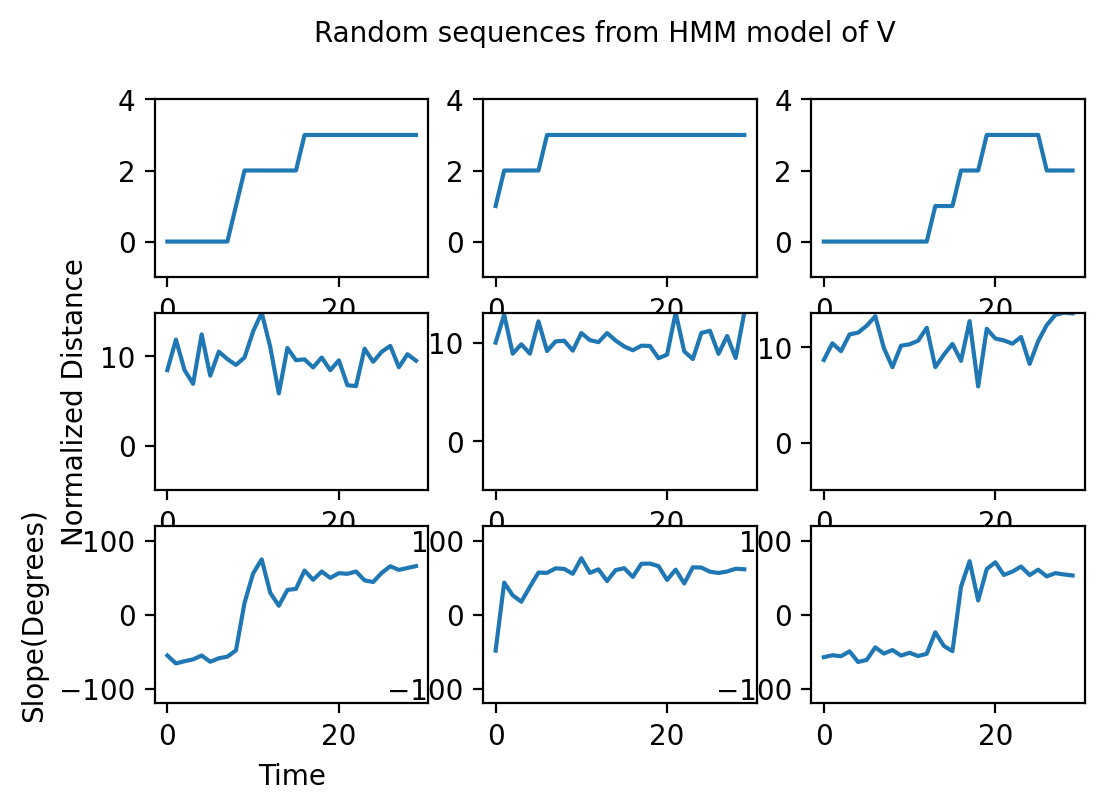

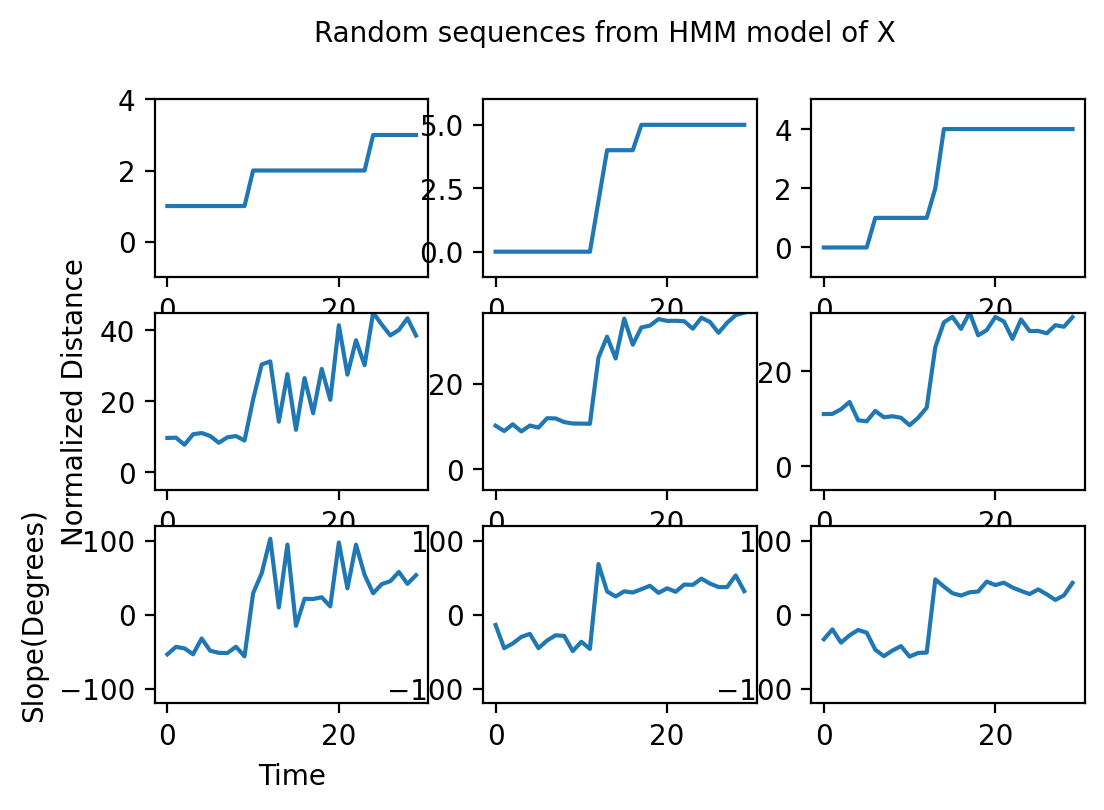

In [17]:
pts, feature_symbol, sampled_symbol = createData(save=False)


feature_symbol = np.transpose(feature_symbol)


letter = classifier(hmm_learn, data_labels, feature_symbol, useprint=True)


print("This is classified as a ", letter)

corr_letter = input("What were you actually drawing? ")

char = data_labels.index(letter)
corr_char = data_labels.index(corr_letter)

chars = [char] + [corr_char]

samples=3
modelvisual(hmm_learn, data_labels, samples, chars=chars)
